In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 


# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(),'..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]
for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

import astrobot 
from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# To read clipboard
# pd.read_clipboard()

In [2]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

from astrobot.energy_survey import EnergySurvey as es
from astrobot.viz4 import Viz4

In [3]:
dd = es.com_survey_df()
kk = es.com_key_df()

In [5]:
# Find appropriate keys here by filtering key df 
kk

,fileorder,varname,vartype,length,format,label,val
0,1,PUBID,Char,5,NaN,Building identifier,00001 - 06720
1,2,REGION,Char,1,$REGION.,Census region,'1' = 'Northeast'\n'2' = 'Midwest'\n'3' = 'Sou...
2,3,CENDIV,Char,1,$CENDIV.,Census division,'1' = 'New England'\n'2' = 'Middle Atlantic'\n...
3,4,PBA,Char,2,$PBA.,Principal building activity,'01' = 'Vacant'\n'02' = 'Office'\n'04' = 'Labo...
4,5,FREESTN,Char,1,$YES.,Freestanding building,1' = 'Yes'\nMissing='No'
...,...,...,...,...,...,...,...
1114,1115,DHCLBTU,Num,8,NaN,District heat cooling use (thous Btu),NaN
1115,1116,DHWTBTU,Num,8,NaN,District heat water heating use (thous Btu),NaN
1116,1117,DHCKBTU,Num,8,NaN,District heat cooking use (thous Btu),NaN
1117,1118,DHOTBTU,Num,8,NaN,District heat miscellaneous use (thous Btu),NaN


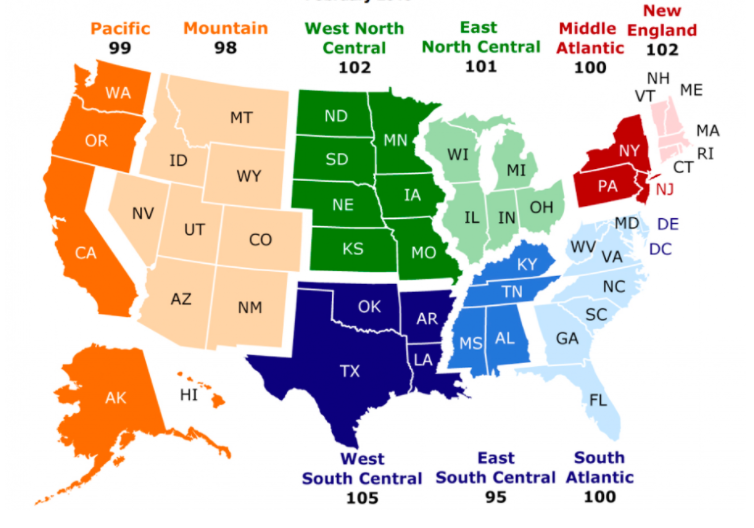

In [6]:
# Census divisions 
from IPython.display import Image
census_fpath = os.path.join(home, "astrobot", "resources", "eia", "census_divs.png")
assert os.path.exists(census_fpath)
Image(census_fpath)

In [90]:
# List census districts 
print(kk.loc[2, "val"])
print('----\n')
# List PBA 
print(kk.loc[3, 'val'])
print('----\n')

'1' = 'New England'
'2' = 'Middle Atlantic'
'3' = 'East North Central'
'4' = 'West North Central'
'5' = 'South Atlantic'
'6' = 'East South Central'
'7' = 'West South Central'
'8' = 'Mountain'
'9' = 'Pacific'
----

'01' = 'Vacant'
'02' = 'Office'
'04' = 'Laboratory'
'05' = 'Nonrefrigerated warehouse'
'06' = 'Food sales'
'07' = 'Public order and safety'
'08' = 'Outpatient health care'
'11' = 'Refrigerated warehouse'
'12' = 'Religious worship'
'13' = 'Public assembly'
'14' = 'Education'
'15' = 'Food service'
'16' = 'Inpatient health care'
'17' = 'Nursing'
'18' = 'Lodging'
'23' = 'Strip shopping mall'
'24' = 'Enclosed mall'
'25' = 'Retail other than mall'
'26' = 'Service'
'91' = 'Other'
----



In [41]:
# 7=West South Central Office
d,k = dd,kk

# Filter
d = d.query('vacant != 1 and monuse > 10') # Get rid of bad data
#d = d.query('1e9 > sqft > 1000')       # For larger samples
#d = d.query('cendiv == 7')       
d = d.query('yrcon > 2000')
d = d.query('pba == {}'.format(int(2)))   # Office
do = d

print('sample #: {}; represents: {} '.format(do.shape[0], do.finalwt.sum()))

do = es.loads(do)
_do = do 

do.index = range(do.shape[0])
_do = do.sort_values('eui', ascending=False)[es.ldlst()].iloc[1:-1, :]
#eui = _do.sum(axis=1)
# print('eui:', eui * 3.15)
#do['eui'].sort_values('eui', ascending=False).plot()

eui = do.sort_values('eui')['eui'] * 3.15


sample #: 184; represents: 136353.55707343837 


                 eui
count  136252.000000
mean      202.051935
std       154.595251
min         5.382900
25%        91.437837
50%       164.152800
75%       269.970750
max      1669.888691


array([[<AxesSubplot:title={'center':'eui'}>]], dtype=object)

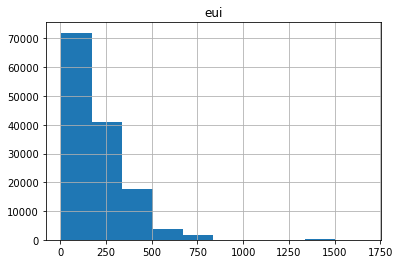

In [66]:
#eui.describe()
#eui.hist()

wts = do[['finalwt', 'eui']].sort_values('eui').to_numpy()

L = []
for wt, _eui in wts:
    L.extend(list(np.ones(int(wt)) * _eui * 3.15))
df = pd.DataFrame({'eui': L})

print(df.describe())
df.hist()



sample #: 47; represents: 44253.6107910623 
eui: 203.00625692307693
cooling: % 4.585031092675605
heating: % 26.421035397112846


<AxesSubplot:>

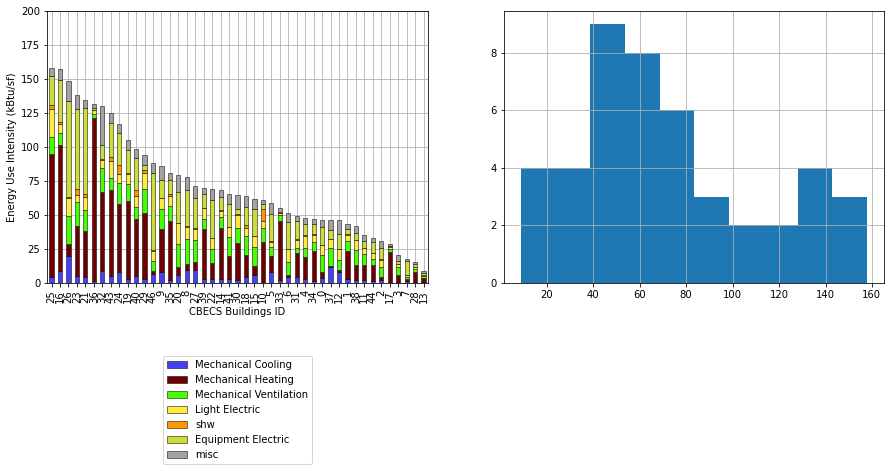

In [192]:
# 3=East North Central Office
d,k = dd,kk


# Filter
d = d.query('vacant != 1 and monuse > 10') # Get rid of bad data
d = d.query('1e9 > sqft > 1000')       # For larger samples
d = d.query('cendiv == 3')       
d = d.query('yrcon > 1990')
d = d.query('pba == {}'.format(int(2)))   # Office
do = d

print('sample #: {}; represents: {} '.format(do.shape[0], do.finalwt.sum()))
do = es.loads(do)
_do = do 


do.index = range(do.shape[0])
_do = do.sort_values('eui', ascending=False)[es.ldlst()].iloc[1:-1, :]
eui = _do.sum(axis=1).median()
print('eui:', eui * 3.15)
print('cooling: %', _do['cool'].median() / eui * 100)
print('heating: %', _do['heat'].median() / eui * 100)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
Viz4.stacked_eui_plot(_do, 200, showlegend=True, ax=ax[0])
_do.sum(axis=1).hist(ax=ax[1])
